In [1]:
# 1) Install libraries: !pip install pandas numpy matplotlib seaborn scikit-learn nltk

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Download NLTK stopwords & lemmatizer (first time only)
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ketki\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Ketki\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
#Load dataset

df = pd.read_csv("Twitter_Data.csv")

# Rename the columns
df.columns = ['text', 'label']  # 'text' = cleaned text, 'label' = sentiment
df.dropna(inplace=True)
df.head()

print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
print(df.head())

Shape: (162969, 2)
Columns: ['text', 'label']
                                                text  label
0  when modi promised “minimum government maximum...   -1.0
1  talk all the nonsense and continue all the dra...    0.0
2  what did just say vote for modi  welcome bjp t...    1.0
3  asking his supporters prefix chowkidar their n...    1.0
4  answer who among these the most powerful world...    1.0


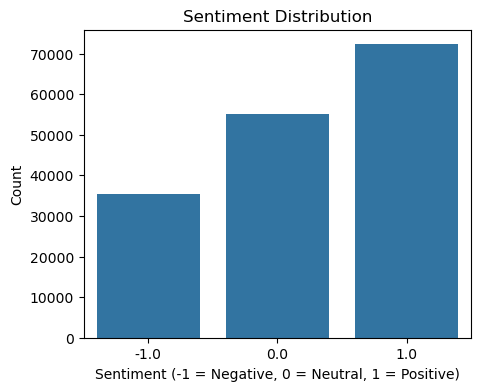

In [7]:
plt.figure(figsize=(5,4))
sns.countplot(x='label', data= df)
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment (-1 = Negative, 0 = Neutral, 1 = Positive)")
plt.ylabel("Count")
plt.show()

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['text'])  # cleaned text
y = df['label']  # sentiment labels

#split data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [26]:
model = LogisticRegression(max_iter=5000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("\nAccuracy:", acc)


Accuracy: 0.9263361354850586


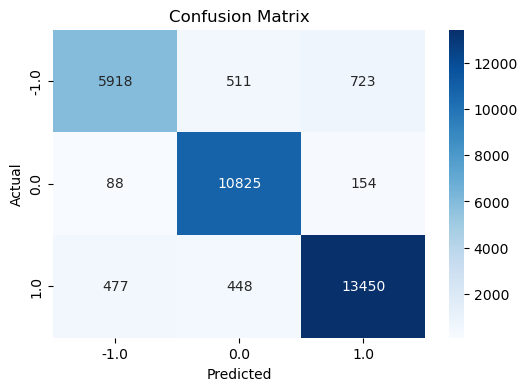

In [27]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()